# Introduction: HCP 1200 Sample Data Analysis

In [1]:
from os import system

import pandas as pd
import glob
import scripts.vizer as vz
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

In [2]:
hcp = pd.read_csv("data/HCP_1200.csv")

In [3]:
def convert_categorical_to_num(series):
    """
    Converts categorical data, such as age, to a quantifiable number. Uses the unique
    values in the series to create a list of the variables, and then uses the index of the variables
    as the categorical number.
    
    Params
    series - pandas series object
    
    Return
    converted_series - series with the values converted to a categorical number. This will be used to replace the old series
    """
    
    unique_values = list(series.unique()) # gets unique values in the series as a list
    converted_series = series.apply(lambda x: unique_values.index(x))
    
    return converted_series

In [4]:
hcp['sex'] = convert_categorical_to_num(hcp['sex'])
hcp['race'] = convert_categorical_to_num(hcp['race'])

In [5]:
hcp

,subject,sex,age,svol,race,SSAGA_Alc_D4_Ab_Dx,SSAGA_Alc_D4_Dp_Dx,SSAGA_Mj_Ab_Dep
0,100206,0,27,1239692,0,1,1,0
1,100307,1,27,957615,0,1,1,0
2,100408,0,33,1106881,0,1,1,1
3,100610,0,27,1155067,0,1,1,0
4,101006,1,35,916973,1,5,1,0
...,...,...,...,...,...,...,...,...
1103,992774,0,35,986206,0,1,1,0
1104,993675,1,29,912719,0,1,1,0
1105,994273,0,30,1069490,0,5,1,1
1106,995174,0,25,1088417,0,1,1,0


# Quick Data Summary
For our target variables $age$ and $sex$, we have a negative skew and an even distribution, respectively.

Number of data points:  1108
Number of features:  8


                    num_present      max     min          mean     median
subject                    1108   996782  100206  3.725831e+05   211366.5
sex                        1108        1       0  5.442238e-01        1.0
age                        1108       37      22  2.880054e+01       29.0
svol                       1108  1461710  748507  1.032730e+06  1028310.0
race                       1108        5       0  4.729242e-01        0.0
SSAGA_Alc_D4_Ab_Dx         1108        5       1  1.606498e+00        1.0
SSAGA_Alc_D4_Dp_Dx         1108        5       1  1.227437e+00        1.0
SSAGA_Mj_Ab_Dep            1108        1       0  9.205776e-02        0.0 





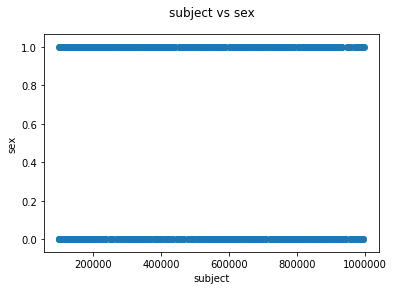

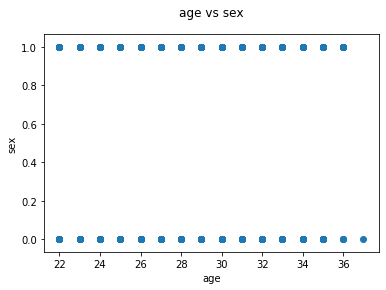

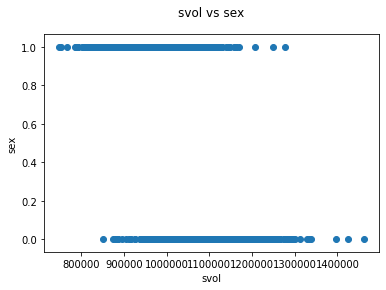

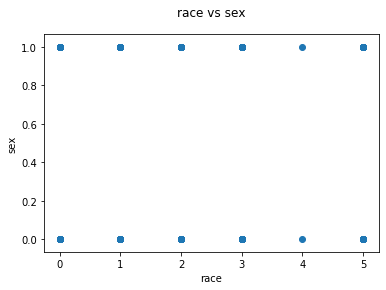

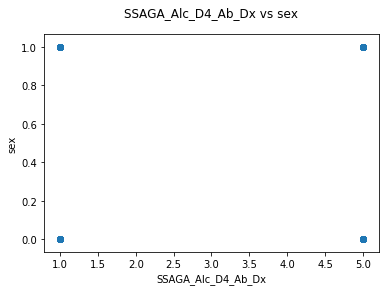

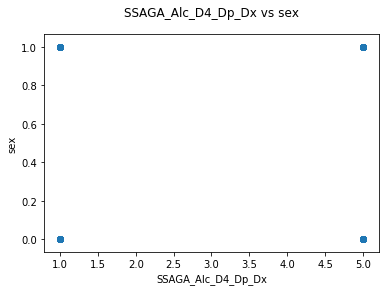

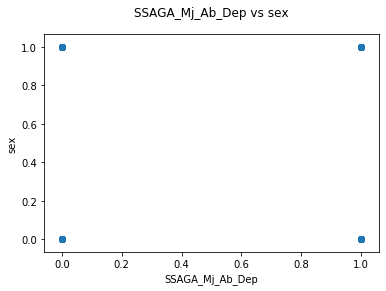

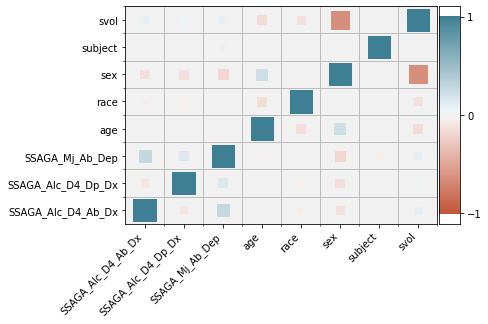

In [6]:
vz.summary(hcp, target_name="sex")

In [7]:
hcp['count'] = [1 for i in range(hcp.shape[0])]

       subject    age       svol race SSAGA_Alc_D4_Ab_Dx SSAGA_Alc_D4_Dp_Dx  \
           sum    sum        sum  sum                sum                sum   
sex                                                                           
0    193185574  14087  560691169  225                913                693   
1    219636540  17824  583574047  299                867                667   

    SSAGA_Mj_Ab_Dep count  
                sum   sum  
sex                        
0                76   505  
1                26   603  


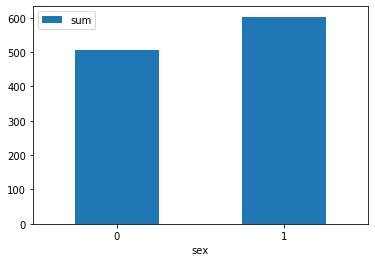

In [8]:
df1 = hcp.groupby('sex').agg(['sum'])
print(df1)
axes = df1.plot.bar(y='count', rot=0)
# axes.figure.savefig('sex_distrib.svg')

      subject sex       svol race SSAGA_Alc_D4_Ab_Dx SSAGA_Alc_D4_Dp_Dx  \
          sum sum        sum  sum                sum                sum   
age                                                                       
22   20440737  18   55149611   48                 72                 56   
23   22765360  27   66028023   69                 96                 76   
24   15782258  14   48799961   21                 74                 50   
25   28616156  25   72713227   56                113                101   
26   28517016  51   92708735   47                149                109   
27   40469415  45  115912378   40                185                121   
28   35313445  51   98220845   32                162                134   
29   38535115  55   99120674   27                137                133   
30   36197952  60   96324869   28                181                113   
31   29696725  50   91641392   30                137                105   
32   34554398  56   94314

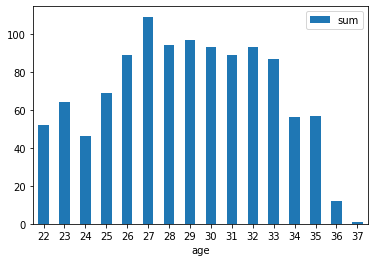

In [9]:
df2 = hcp.groupby('age').agg(['sum'])
print(df2)
axes2 = df2.plot.bar(y='count', rot=0)
axes2.figure.savefig('age_distrib.svg')

# Running the Model

We plot the accuracy of the model. A prediction is classified correct if it is a member of the top k predicted classes. Here, we chose  𝑘∈[1,5] . We therefore plot the accuracy per epoch for each k.

In the case of sex, we only have two possible classes (male and female). Therefore, if  𝑘=1 , the accuracy is just the percentage of correctly predicted sexes. If  𝑘≥2 , the accuracy will always be 100% since any prediction is a prediction among the  𝑘≥2  classes. For example, let's say a predicted sex is correct if it is a member of the top 2 predicted classes. In this case, the top two predicted classes are male and female. Any prediction will always be a member of this set and therefore it counts as correct, hence 100% accuracy. For sex, it is only interesting to analyze the accuracy among the top 1 classes.